In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [7]:
num_classes = 3
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
#If binary classification, no need to use onehot encoding

In [8]:
def create_nn_model(optimizer='rmsprop'):
    nn_model = models.Sequential()
    nn_model.add(layers.Dense(64, activation='relu', input_shape=(20,)))
    nn_model.add(layers.Dense(32, activation='relu'))
    nn_model.add(layers.Dense(num_classes, activation='softmax'))
    #If binary classification, units=1 and activation='sigmoid'

    nn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #If binary classification, loss='binary_crossentropy' and metrics=['binary_accuracy']

    return nn_model

In [9]:
steps =[('dtf', Data_Transformer()),
        ('rescale', MinMaxScaler()),
        ('keras_model', KerasClassifier(model=create_nn_model, verbose=0))]
model = Pipeline(steps)
param_grid = {'keras_model__batch_size': [32, 64],
                'keras_model__epochs': [10, 50, 100],
                'keras_model__optimizer': ['rmsprop', 'adam']}
model_gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring=make_scorer(recall_score, average='micro', greater_is_better=True))

In [10]:
model_gsv.fit(X_train, y_train_onehot)
#If binary classification, train with y_train

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000002793D84D430>),
                                       ('rescale', MinMaxScaler()),
                                       ('keras_model',
                                        KerasClassifier(model=<function create_nn_model at 0x0000027933637AF0>, verbose=0))]),
             param_grid={'keras_model__batch_size': [32, 64],
                         'keras_model__epochs': [10, 50, 100],
                         'keras_model__optimizer': ['rmsprop', 'adam']},
             scoring=make_scorer(recall_score, average=micro))

In [11]:
model_gsv.best_params_

{'keras_model__batch_size': 64,
 'keras_model__epochs': 50,
 'keras_model__optimizer': 'rmsprop'}

In [12]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_keras_model__batch_size', 'param_keras_model__epochs', 'param_keras_model__optimizer', 'mean_test_score', 'rank_test_score']]
result

,param_keras_model__batch_size,param_keras_model__epochs,param_keras_model__optimizer,mean_test_score,rank_test_score
0,32,10,rmsprop,0.7348,7
1,32,10,adam,0.7369,4
2,32,50,rmsprop,0.7408,2
3,32,50,adam,0.7326,8
4,32,100,rmsprop,0.7349,6
5,32,100,adam,0.7320,9
6,64,10,rmsprop,0.7030,12
7,64,10,adam,0.7135,11
8,64,50,rmsprop,0.7410,1
9,64,50,adam,0.7399,3


In [13]:
y_test_pred = model_gsv.predict(X_test)

In [14]:
y_test_pred = np.argmax(y_test_pred, axis=1)

In [15]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       822
           1       0.84      0.71      0.77      1217
           2       0.64      0.77      0.70       461

    accuracy                           0.76      2500
   macro avg       0.74      0.76      0.75      2500
weighted avg       0.77      0.76      0.76      2500



In [16]:
confusion_matrix(y_test,y_test_pred)

array([[666, 103,  53],
       [203, 870, 144],
       [ 42,  65, 354]], dtype=int64)

In [17]:
y_test_pred_proba = model_gsv.predict_proba(X_test)

Text(0.5, 1.0, 'Receiver Operating Characteristic - RandomForestClassifier')

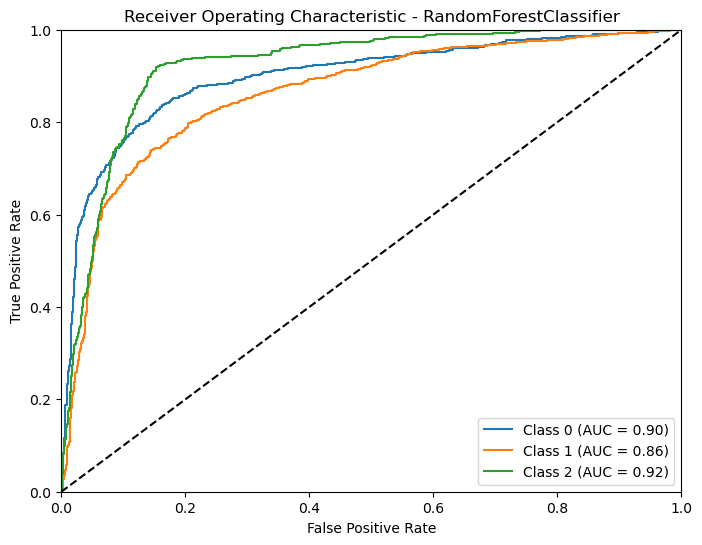

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(model_gsv.best_estimator_.classes_)):
    y_true = (y_test == model_gsv.best_estimator_.classes_[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {model_gsv.best_estimator_.classes_[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RandomForestClassifier')

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from skorch.classifier import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [20]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)
        #If binary classification, last layer outputs 2 values
    
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.softmax(self.fc3(x), dim=1)
        #If binary classification, last layer uses nn.functional.sigmoid
        return x

In [21]:
class CustomScaler():

    def fit(self, X, y=None):
        self.scaler = MinMaxScaler()
        self.scaler.fit(X)
        return self
    
    def transform(self, X, y=None):
        X = self.scaler.transform(X)
        return torch.tensor(X, dtype=torch.float32)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [22]:
steps =[('dtf', Data_Transformer()),
        ('rescale', CustomScaler()),
        ('nn_model', NeuralNetClassifier(module=NeuralNetwork, device='cuda' if torch.cuda.is_available() else 'cpu'))]
        #If binary classification, nn_model uses NeuralNetBinaryClassifier 
model = Pipeline(steps)
param_grid = {'nn_model__batch_size': [32, 64],
                'nn_model__max_epochs': [10, 50, 100],
                'nn_model__lr': [0.01, 0.1],
                'nn_model__optimizer': [optim.Adam, optim.RMSprop]}
model_gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring=make_scorer(recall_score, average='micro', greater_is_better=True))

In [23]:
model_gsv.fit(X_train, y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8312       0.6320        0.7637  0.4537
      2        0.7150       0.6810        0.6987  0.4185
      3        0.6735       0.6900        0.6947  0.2990
      4        0.6654       0.6950        0.6892  0.4930
      5        0.6523       0.6870        0.6901  0.4568
      6        0.6430       0.6930        0.6678  0.4827
      7        0.6320       0.6920        0.6557  0.5256
      8        0.6229       0.6980        0.6529  0.4678
      9        0.6183       0.7080        0.6668  0.5081
     10        0.6175       0.7120        0.6599  0.3650
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7868       0.6340        0.7920  0.4272
      2        0.6789       0.7120        0.6877  0.4127
      3        0.6431       0.7430        0.6377  0.3770
      4        0.6276       0.7

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x0000027941487700>),
                                       ('rescale',
                                        <__main__.CustomScaler object at 0x00000279414870A0>),
                                       ('nn_model',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.NeuralNetwork'>,
))]),
             param_grid={'nn_model__batch_size': [32, 64],
                         'nn_model__lr': [0.01, 0.1],
                         'nn_model__max_epochs': [10, 50, 100],
                         'nn_model__optimizer': [<class 'torch.optim.adam.Adam'>,
                                                 <class 'torch.optim.rmsprop.RMSprop'>]},
             scoring=make_scorer(recall_score, average=micro))

In [24]:
model_gsv.best_params_

{'nn_model__batch_size': 32,
 'nn_model__lr': 0.01,
 'nn_model__max_epochs': 50,
 'nn_model__optimizer': torch.optim.adam.Adam}

In [25]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_nn_model__batch_size', 'param_nn_model__max_epochs', 'param_nn_model__optimizer', 'mean_test_score', 'rank_test_score']]
result

,param_nn_model__batch_size,param_nn_model__max_epochs,param_nn_model__optimizer,mean_test_score,rank_test_score
0,32,10,<class 'torch.optim.adam.Adam'>,0.7233,3
1,32,10,<class 'torch.optim.rmsprop.RMSprop'>,0.6720,13
2,32,50,<class 'torch.optim.adam.Adam'>,0.7309,1
3,32,50,<class 'torch.optim.rmsprop.RMSprop'>,0.7183,7
4,32,100,<class 'torch.optim.adam.Adam'>,0.7146,8
5,32,100,<class 'torch.optim.rmsprop.RMSprop'>,0.7026,9
6,32,10,<class 'torch.optim.adam.Adam'>,0.5886,18
7,32,10,<class 'torch.optim.rmsprop.RMSprop'>,0.3340,20
8,32,50,<class 'torch.optim.adam.Adam'>,0.6324,16
9,32,50,<class 'torch.optim.rmsprop.RMSprop'>,0.4117,19


In [26]:
y_test_pred = model_gsv.predict(X_test)

In [27]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       822
           1       0.74      0.81      0.77      1217
           2       0.69      0.49      0.58       461

    accuracy                           0.74      2500
   macro avg       0.73      0.69      0.70      2500
weighted avg       0.74      0.74      0.73      2500



In [28]:
confusion_matrix(y_test,y_test_pred)

array([[631, 164,  27],
       [155, 985,  77],
       [ 42, 191, 228]], dtype=int64)

In [29]:
y_test_pred_proba = model_gsv.predict_proba(X_test)

Text(0.5, 1.0, 'Receiver Operating Characteristic - RandomForestClassifier')

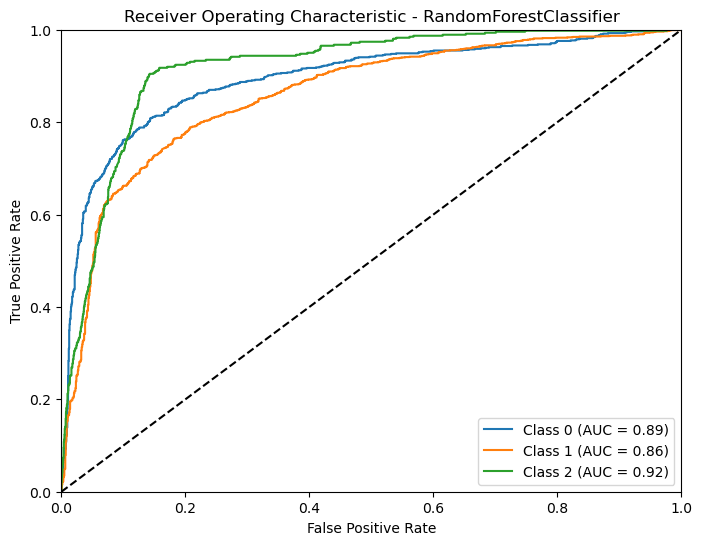

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(model_gsv.best_estimator_.classes_)):
    y_true = (y_test == model_gsv.best_estimator_.classes_[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {model_gsv.best_estimator_.classes_[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RandomForestClassifier')